# Undergraduate Economic Society: ECONference Report

<img src="banner.jpg" style="width: 400px;"/>

## Introduction

The Undergraduate Economic Society hosted ECONference, a panelist event hosted on April 16th 2019 from 5:30PM - 8:30PM. It was held in the Student Services Center's Multipurpose room. Some distinguished speakers included Guy Berger and Ryan Sullivan, both highly regarded industrymen from LinkedIn and Intensity. ECONference also hosted a guided graduate student panel and an undergraudate panel. Italian catered food was provided for all guests. 116 non-UES members attended ECONference, a mark that beat out previous year's ECONference attendance of 85. The event also featured several other distinguished individuals from Analytic Ventures, Union Bank, NorthWestern Mutual, and other companies for a chance for students to network with during dinnertime. 

## Objective

The first data report from the Undergraduate Economic Society was written in the year of 2016 - 2017. Every following iteration of the report was analyzed using Excel and then compiled using Tableau. Because the Undergraduate Economic Society have members progressing through the new Data Science Major/Minor, we wanted to compile this report using Python and Pandas with help from data visualization libraries like Seaborn and matplotlib.

This report is compiled using Jupyter Notebook. The code that generates the analysis and data visualizations is posted below. The code is commented to help readers follow along if desired, although those who do not understand Python can follow along with the analysis that complements the code. We hope that this report can be the start of a more technical, rigorous tradition for data analysis within UES and the Economics community.

In [179]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# Import the appropriate CSV files into Pandas from the source folder.
econ_one = pd.read_csv('econference.csv')
econ_two = pd.read_csv('econference_two.csv')
mixer = pd.read_csv('faculty_mixer.csv') # This data is not used in this report
talks = pd.read_csv('econ_talks.csv') # This data is not used in this report

## General Data Cleaning

There were two forms of registration for ECONFerence. One way was through pre-registration on EventBrite, and another was using Walk-in registration. The two registration forms had slightly different questions and data columns, so we eliminated the irrelevant columns while changing the column names to something consistent and readable.

In [181]:
# Drop the irrelevant columns
econ_one.drop(columns = ['Order #', 'Order Date', 'Quantity', 'Ticket Type', 'Order Type', 'Total Paid', 'Eventbrite Fees', 'Eventbrite Payment Processing', 'Attendee Status', 'How did you hear about this event?'], inplace = True)
econ_two.drop(columns = ['Timestamp'], inplace = True)

# Rename the columns
econ_one.columns = ['First Name', 'Last Name', 'Email', 'Major', 'Graduation', 'Advertisement']
econ_two.columns = ['First Name', 'Last Name', 'Email', 'Major', 'Graduation', 'Advertisement']

# Then combine them together to get the dataframe we want
econference = pd.concat([econ_one, econ_two], ignore_index = True)

# For this report, we drop the First Name, Last Name, and Email to anonymize the data
econference = econference[['Major', 'Graduation', 'Advertisement']]

## Field of Study

There was a wide variety of majors that attended our events. First, we must clean the data first in order to sift out the exact proportions of majors that attended ECONference.

In [182]:
# First, we lowercase everything for consistency
econference['Major'] = econference['Major'].apply(lambda x: x.lower())

# Then, clean the majors accordingly.
def clean_majors(data):
    if 'math' in data and 'econ' in data:
        return 'math econ'
    elif 'man' in data and 'sci' in data or 'ms' in data:
        return 'management science'
    elif 'econ' in data and 'math' not in data and 'man' not in data and 'international' not in data:
        return 'economics'
    elif 'business' in data:
        return 'business'
    elif 'bio' in data or 'chem' in data:
        return 'sciences'
    elif 'math' in data:
        return 'mathematics'
    elif 'cs' in data or 'computer' in data or 'engineering' in data or 'data' in data:
        return 'engineering'
    else:
        return 'other'
    
# Apply this function to clean the data within the dataframe
econference['Major'] = econference['Major'].apply(clean_majors)

# Get a preview of what the dataframe looks like
econference.head()

,Major,Graduation,Advertisement
0,math econ,2021,Flyers
1,engineering,Spring 2021,Facebook
2,management science,"Spring, 2020",Facebook | Flyers | Professor
3,management science,2019,Email
4,economics,Spring 2020,Email | Professor


This is a humble lesson in how important good survey design is. Because we did not place any explicit direction on how they should answer their Major, students often answered with many arbitrary fields of study, and we must make difficult decisions to categorize those majors. This also requires more time to clean the data. In the future, improved surveys can make data cleaning much easier.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Major')]

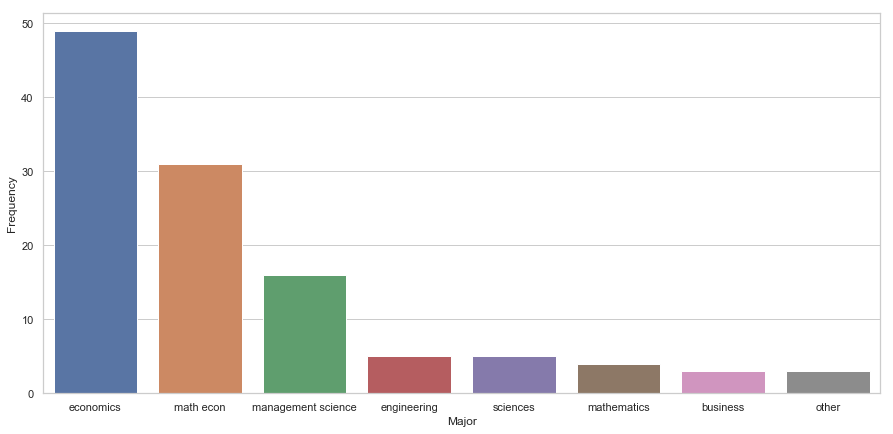

In [183]:
# Data we are using
majors = pd.DataFrame(econference['Major'].value_counts())

# Sets the graphic style of the seaborn plot
sns.set(style="whitegrid")

# Sets the size of the seaborn plot
f, ax = plt.subplots(figsize=(15, 7))

# Creates the plot
major = sns.barplot(y = majors['Major'], x = list(majors.index))

# Adds the axis names
major.set(xlabel = 'Major', ylabel = 'Frequency')

As we can see from the visualization above, the most popular major that attended our event was Economics. The top 3 majors that attended were majors from the Economics Department: Economics, Math-Economics Joint Major, and Management Science. All other majors outside of the Economics Department were separated into categories, not individual majors. There, we can easily see that there are a handful of other related majors who attended our event, from Engineering, Mathematics, and Business. 

In [184]:
majors.reset_index().iloc[:3].sum()['Major'] / majors['Major'].sum()

0.8275862068965517

Here, we can see that the exact proportion of individuals who were from the Economics Department was approximately 83%, an incredible proportion. While the event is certainly catered to students within the Economics Department, we suspect that a significant amount of advertising (Email, Professors) were targeted towards students within the Economics Department. We will see if this is true later when we conduct some A/B testing.

## Year of Graduation

We would like to see the age of students that attended ECONference. Historically, Freshman and Juniors attend our events most likely because they are the demographic most interested in exploring different events. Freshmen are often unsure of their field of study, and some Juniors are transfer students. We will see if this trend continues into ECONference this year.

In [185]:
def clean_graduation(data):
    if '2020' in data or 'SP20' in data:
        return '2020'
    elif '21' in data:
        return '2021'
    elif '22' in data:
        return '2022'
    elif '23' in data:
        return '2023'
    elif '19' in data:
        return '2019'
    else:
        return 'np.NaN'
econference['Graduation'] = econference['Graduation'].apply(clean_graduation)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Year of Graduation')]

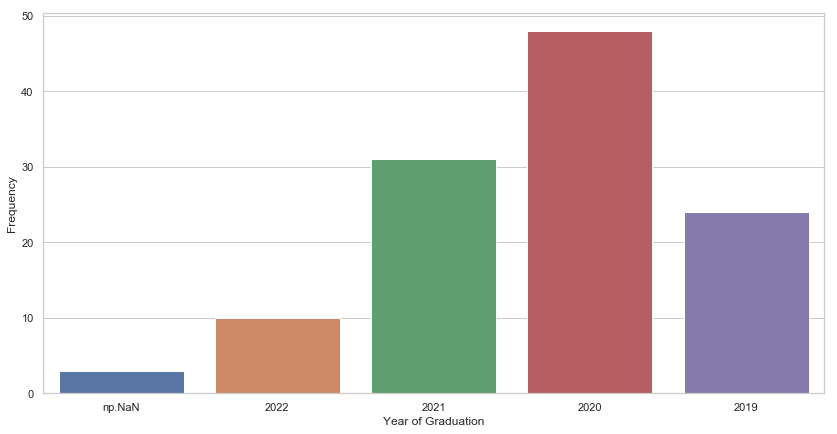

In [186]:
# Sets the size of the Seaborn plot
f, ax = plt.subplots(figsize=(14, 7))

# Data we are using
years = pd.DataFrame(econference['Graduation'].value_counts())
years = years.sort_index(ascending = False)

# Creates the plot
year_plot = sns.barplot(y = years['Graduation'], x = list(years.index))
year_plot.set(xlabel = 'Year of Graduation', ylabel = 'Frequency')

Interestingly enough, the most common major was the class of 2020, or the Junior class. The least most common major was the class of 2022, or the Freshman class. We can see the exact proportion of the distribution with the code below:

In [187]:
econference['Graduation'].value_counts()/econference['Graduation'].value_counts().sum()

2020      0.413793
2021      0.267241
2019      0.206897
2022      0.086207
np.NaN    0.025862
Name: Graduation, dtype: float64

As seen from the table above, we can easily see that most students who attended were Juniors and Sophomores, consisting of a combined 68% of total attendees. Traditionally, we would conclude that perhaps Juniors and Sophomores are more interested in coming out to these events as they begin searching for internships--something we had concluded in a previous iteration of the ECONference report. However, what if the students coming out to our event is mostly influenced by the way we marketed ECONference? In other words, students come to ECONference not because their demographic is more interested in ECONference. Rather, students come to ECONference because our marketing methods target them the most.

We can test this with an A/B test below.

## Marketing Methods

Aside from the demographics, now we want to look at which marketing methods were most useful! We will now try to create some visualizations that help us answer that question. But first, there's a lot of data we have to clean.

In [188]:
def marketing_dictionary(data):
    data_dict = {}
    # This allows us to split the data accordingly!
    data = data.split(' | ')
    # This will split up the weights accordingly.
    for i in data:
        data_dict[i] = 1/len(data)
    return data_dict
ad_weight = econference['Advertisement'].apply(marketing_dictionary)

Now that we've cleaned the data, we want to see which marketing method is most effective. Attendees were allowed to choose several marketing methods they saw. Because we only want each person to count for one frequency, **each of their votes were weighed**. Meaning that if the attendee voted for Facebook and Professor for their marketing method, we tally 0.5 for each Facebook and Professor. The code below will tally everything for us!

In [189]:
# We will record the frequency each marketing method shows up in the dataframe using this disctionary
marketing_total = {'Flyers': 0, 'Facebook': 0, 'Professor': 0, 'Email': 0, 'Word of Mouth': 0, 'Other': 0}

# This method goes into each dictionary and sums up the corresponding marketing method into marketing_total
def aggregate_data(data):
    xd = 0
    for key in marketing_total:
        if key in data:
            marketing_total[key] += data[key]
    return data
ad_weight.apply(aggregate_data)

# Now we convert the dictionary into a dataframe, and sort the values.
marketing_df = pd.DataFrame.from_dict(data = marketing_total, orient = 'index')

# Save this into the dataframe
marketing_df['Frequency'] = marketing_df[0]

# Sort it into descending order
marketing_df = marketing_df[['Frequency']].sort_values('Frequency', ascending = False)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Marketing Method')]

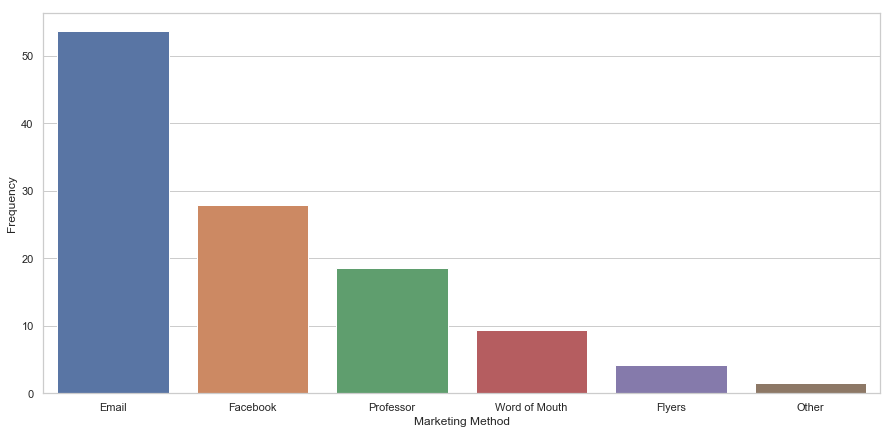

In [190]:
# And we create the visualization!
f, ax = plt.subplots(figsize=(15, 7))

# Creates the plot
market = sns.barplot(y = marketing_df['Frequency'], x = list(marketing_df.index))

market.set(xlabel = 'Marketing Method', ylabel = 'Frequency')

This shows us that Email was the most effective form of marketing, whereas Flyers were the least effective. This is concerning, because Flyering is one of the most pricey forms of marketing UES has. Something UES has been doing this year is to maintain a mailing list for all our events using MailChimp, and it seems like it has been paying off! Another form of email advertisement that happens is when Dr. Famulari sends out emails advertising ECONference which is sent out to all her students.

In [191]:
marketing_df

,Frequency
Email,53.666667
Facebook,27.833333
Professor,18.500000
Word of Mouth,9.333333
Flyers,4.166667
Other,1.500000


## A/B Testing

As mentioned earlier, we hypothesized that students attend ECONference not because of their field of study or because of their graduation year, but because the marketing method targets them the most. Indeed, the emails advertising ECONference come from Dr. Famulari on a mailing list of all students in the Economics Department. This implies that the students in the Economics Department come **because they received the email from Dr. Famulari, or other advertisement method that only students from the Economics know of**. The only forms of advertisement that students from the Economics Department may know about are from Dr. Famulari's Emails, UES's Emails, or if a professor advertised ECONference in class. 

How can we test if this is the case though? This is where A/B, or [Permutation Testing](http://faculty.washington.edu/kenrice/sisg/SISG-08-06.pdf) is useful. We will not discuss the logistics of permutation testing in this report, but it allows us to see if two different distributions are similar or not. In this case, we compare if the distribution of marketing methods for Economics Department students are different from all other students who attended ECONference.

### Experimental Design

**Null Hypothesis**: There is no difference in distribution of students who came to ECONference from the Economics Department and not from the Economics Department because of the specified marketing method. (Email/Facebook/Professor/Word of Mouth/Flyers/Other).

**Alternative Hypothesis**: There is a difference in distribution of students who came to ECONference from the Economics Department and not from the Economics Department because of the specified marketing method. (Email/Facebook/Professor/Word of Mouth/Flyers/Other).

**Significance Level**: 0.05

**Test Statistic**: Proportion of students from Economics Department who came because of that marketing method* - Proportion of students not from Economics Department who came because of that marketing method.

We are going to do one permutation test per marketing method. There are six different marketing methods, so we will receive six different p-values.

In [200]:
# Change 'Advertisement' to a dictionary so it's easier to work with
econference['Advertisement'] = ad_weight.to_frame()

# Convert the dictionary into columns of the dictionary, similar to OneHotEncoder but WITHOUT WEIGHTS like in the dictionary
for i in ['Email', 'Facebook', 'Professor', 'Word of Mouth', 'Flyers', 'Other']:
    econference[i] = econference['Advertisement'].apply(lambda x: 1 if i in x else 0)
econference.head()

,Major,Graduation,Advertisement,Email,Facebook,Professor,Word of Mouth,Flyers,Other
0,math econ,2021,{'Flyers': 1.0},0,0,0,0,1,0
1,engineering,2021,{'Facebook': 1.0},0,1,0,0,0,0
2,management science,2020,"{'Facebook': 0.3333333333333333, 'Flyers': 0.3...",0,1,1,0,1,0
3,management science,2019,{'Email': 1.0},1,0,0,0,0,0
4,economics,2020,"{'Email': 0.5, 'Professor': 0.5}",1,0,1,0,0,0


For each A/B test, I will shuffle the Email, Facebook, Professor, Word of Mouth, Flyers, and Other column. The dataframe is visualized above for easy reference.

In [193]:
# Conduct an A/B test on Major onto every single advertising method
major_permutation = econference[['Major', 'Email']]
obs = econference.groupby('Major')['Email'].mean()[['economics', 'math econ', 'management science']].sum()

# Creates one test statistic for the respective column
def simulate_null(column):
    shuffle = econference[column].sample(replace = False, frac = 1).reset_index(drop = True)
    shuffled_original = (econference.assign(**{'Shuffled Default':shuffle}))
    return shuffled_original.groupby('Major')['Shuffled Default'].mean()[['economics', 'math econ', 'management science']].sum()

In [194]:
# Find all the observed values
marketing_methods = ['Email', 'Facebook', 'Professor', 'Word of Mouth', 'Flyers', 'Other']
obs_dict = {}
for i in marketing_methods:
    obs_dict[i] = econference.groupby('Major')[i].mean()[['economics', 'math econ', 'management science']].sum()
    
# Output the observed values
obs_dict

{'Email': 1.7974818959842,
 'Facebook': 0.7207044107965767,
 'Professor': 0.7010368663594471,
 'Word of Mouth': 0.19679888084265965,
 'Flyers': 0.26131500987491774,
 'Other': 0.03225806451612903}

In [195]:
# Now we will find the p-values for each of the respective marketing methods.
p_value_dict = {}
n = 3000
for i in marketing_methods:
    simulation_list = []
    for j in range(n):
        simulation_list.append(simulate_null(i))
    p_value_dict[i] = np.count_nonzero(simulation_list > obs_dict[i])/n

In [196]:
# These are the p-values!
p_value_dict

{'Email': 0.025333333333333333,
 'Facebook': 0.9433333333333334,
 'Professor': 0.25066666666666665,
 'Word of Mouth': 0.978,
 'Flyers': 0.2826666666666667,
 'Other': 0.7333333333333333}

### Conclusions

We fail to reject the null hypothesis for Facebook, Professor, Word of Mouth, Flyers, and Other because the p-value is greater than 0.05. However, We **reject the null hypothesis for Email**. We can conclude that the distribution of students between Economics Department students and Non-Economics Department students is different among students who came because of the email. We cannot conclude the reason for why the distributions are different, but the very notion that the students that came out through email marketing methods were different is telling.

In [197]:
# Just to visualize the plot
n = 3000
email_list = []
for j in range(n):
    email_list.append(simulate_null('Email'))

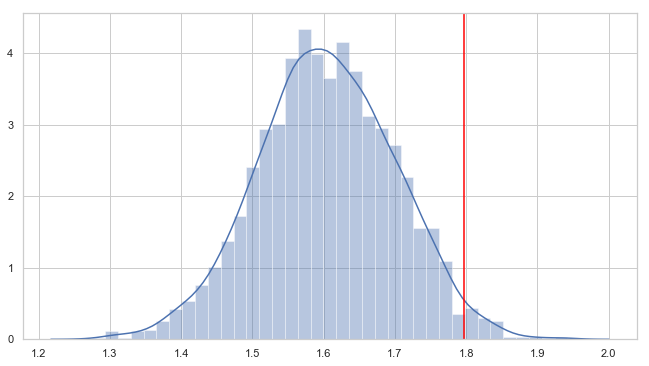

In [198]:
fig, ax = plt.subplots(figsize= (11, 6))
sns.distplot(email_list, hist = True)
plt.axvline(1.7974818959842, 0, 2, color = 'red')


Here, we can see that the above distribution is approximately normal (a property of the permutation test) and that the area to the right of the observed value (red line) is very small.

## Thank you for reading!

The material was freshly learned in DSC 80, so there may be errors. Please contact me at cpctc219@gmail.com if you think ths is the case!

Created by Joshua Chan